In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Q1. Who are the top 5 users in Bangalore with the highest number of followers? List their login in order, comma-separated

In [2]:
users = pd.read_csv('users.csv')
users.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,krishnaik06,Krish C Naik,PANASONIC IIC,Bangalore,krishnaik06@gmail.com,False,Data Scientist with ML and Deep Learning expe...,330,30922,0,2016-06-20T09:25:45Z
1,championswimmer,Arnav Gupta,JIOCINEMA,"Bangalore, India",dev@championswimmer.in,True,Director of Engineering - @JioCinema ┃\r\nPast...,351,4664,29,2012-01-13T07:41:40Z
2,arpitbbhayani,Arpit Bhayani,DICEDB,Bangalore,NaN,True,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",188,4561,3,2013-06-20T06:40:12Z
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,False,"""Science is not only a disciple of reason but,...",1563,4090,9313,2016-06-16T05:02:32Z
4,tanaypratap,Tanay Pratap,INVACT,"Bangalore, India",tanay.mit@gmail.com,False,Founder & CEO @invact . Teacher @neogcamp,40,3029,1,2014-12-17T05:15:06Z


In [3]:
users['hireable'] = users['hireable'].fillna(False).astype(bool)

In [4]:
top5 = users.sort_values(by='followers', ascending=False).head()
print(','.join(top5['login'].tolist()))

krishnaik06,championswimmer,arpitbbhayani,manjunath5496,tanaypratap


###Q2. Who are the 5 earliest registered GitHub users in Bangalore? List their login in ascending order of created_at, comma-separated.


In [5]:
users['created_at'] = pd.to_datetime(users['created_at'])

In [7]:
top_earliest = users.sort_values(by='created_at').head()
print(','.join(top_earliest['login'].tolist()))

anandology,irfn,jace,abhisek,abhin4v


###Q3. What are the 3 most popular license among these users? Ignore missing licenses. List the license_name in order, comma-separated.

In [8]:
repos = pd.read_csv('repositories.csv')
repos.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,krishnaik06,krishnaik06/3-Months-RoadMap-For-Data-Science,2022-08-18T15:50:22Z,239,239,NaN,True,True,gpl-3.0
1,krishnaik06,krishnaik06/5-Days-Live-EDA-and-Feature-Engine...,2022-02-17T09:03:19Z,188,188,Jupyter Notebook,True,True,gpl-3.0
2,krishnaik06,krishnaik06/6-Months-Data-Science-Roadmap-,2023-01-07T06:41:22Z,1743,1743,NaN,True,True,gpl-3.0
3,krishnaik06,krishnaik06/Advanced-CNN-Architectures,2020-09-10T16:14:51Z,46,46,Jupyter Notebook,True,True,NaN
4,krishnaik06,krishnaik06/Advanced-House-Price-Prediction-,2020-01-31T05:39:25Z,382,382,Jupyter Notebook,True,True,NaN


In [9]:
repos['license_name'].value_counts().head(3)

license_name
mit           7782
apache-2.0    2696
other         1645
Name: count, dtype: int64

###Q4. Which company do the majority of these developers work at?

In [10]:
users['company'].value_counts().head(1)

company
GOOGLE    15
Name: count, dtype: int64

###Q5. Which programming language is most popular among these users?

In [11]:
repos['language'].value_counts().head(1)

language
JavaScript    6178
Name: count, dtype: int64

###Q6. Which programming language is the second most popular among users who joined after 2020?

In [12]:
users_after_2020 = users[users['created_at'] > '2020-01-01']
users_after_2020.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
25,bigint,Bigint,HEYXYZ,"Bangalore, India",NaN,True,Creator of @heyxyz 🌸,20,1118,198,2020-08-09 17:17:58+00:00
28,techiescamp,TechiesCamp,TECHIESCAMP BY DEVOPSCUBE,Bangalore,NaN,False,Practical DevOps Learning Platform - Follow @t...,54,1113,1,2022-06-06 15:09:55+00:00
30,saadozone,Saad Bin Noman,VANANAM ENTERPRISE,Bangalore,NaN,False,I'm a passionate Full Stack Developer with exp...,10,1086,2171,2023-02-20 09:51:28+00:00
43,yua-9,Yusra Pikhwal,PATAACOPY,"Bangalore,india",NaN,True,Python Lover || \r\nDjango is my crush || \r...,3,767,1298,2020-12-03 20:03:45+00:00
63,keralahacker,Hackwithvyshu,HACK WITH VYSHU,Bangalore,NaN,False,X-BlackHat 🎩 Hacker | Engineer,204,599,1,2020-05-03 19:45:11+00:00


In [13]:
repos_2020 = repos[repos['login'].isin(users_after_2020['login'].tolist())]
repos_2020['language'].value_counts().head()

language
JavaScript    1264
HTML           525
Python         253
CSS            241
TypeScript     168
Name: count, dtype: int64

###Q7. Which language has the highest average number of stars per repository?

In [14]:
avg_stars = repos.groupby('language')['stargazers_count'].mean()
top_lang = avg_stars.idxmax()
top_stars = avg_stars.max()
print(top_lang, top_stars)

Pascal 92.0


###Q8. Let's define leader_strength as followers / (1 + following). Who are the top 5 in terms of leader_strength? List their login in order, comma-separated.

In [15]:
users['leader_strength'] = users['followers'] / (1 + users['following'])
top5_lead = users.sort_values(by='leader_strength', ascending=False).head()
print(','.join(top5_lead['login'].tolist()))

krishnaik06,Hack-with-Github,laxmimerit,tanaypratap,abhishh1


###Q9. What is the correlation between the number of followers and the number of public repositories among users in Bangalore?



In [16]:
correlation = users['followers'].corr(users['public_repos'])
correlation

0.19146960088213336

###Q10. Does creating more repos help users get more followers? Using regression, estimate how many additional followers a user gets per additional public repository.

In [17]:
import csv
followers = []
public_repos = []
with open('users.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        followers_count = int(row['followers'])
        public_repos_count = int(row['public_repos'])
        followers.append(followers_count)
        public_repos.append(public_repos_count)
if len(followers) > 1 and len(public_repos) > 1:
    slope, intercept = np.polyfit(public_repos, followers, 1)

    print(f"{slope:.3f}")
else:
    print("Error")

2.347


###Q11. Do people typically enable projects and wikis together? What is the correlation between a repo having projects enabled and having wiki enabled?

In [18]:
if repos['has_projects'].dtype == 'object':
    repos['has_projects'] = repos['has_projects'].map({'true': True, 'false': False})
if repos['has_wiki'].dtype == 'object':
    repos['has_wiki'] = repos['has_wiki'].map({'true': True, 'false': False})

correlation = repos['has_projects'].corr(repos['has_wiki'])

print(round(correlation, 3))

0.189


###Q12. Do hireable users follow more people than those who are not hireable?

In [19]:
hireable_avg_following = users[users['hireable'] == True]['following'].mean()
non_hireable_avg_following = users[users['hireable'] == False]['following'].mean()
difference = hireable_avg_following - non_hireable_avg_following
difference

63.69848694848693

###Q13. Some developers write long bios. Does that help them get more followers? What's the correlation of the length of their bio (in Unicode characters) with followers? (Ignore people without bios)

In [20]:
import pandas as pd
import statsmodels.api as sm

csv_file = 'users.csv'  

df = pd.read_csv(csv_file)

print("DataFrame Overview:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

df = df[df['bio'].notnull()]

df['bio_word_count'] = df['bio'].str.split().str.len()

X = df['bio_word_count']
y = df['followers']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

slope = model.params['bio_word_count']

print(f"\nRegression slope of followers on bio word count: {slope:.3f}")

DataFrame Overview:
             login           name          company          location  \
0      krishnaik06   Krish C Naik    PANASONIC IIC         Bangalore   
1  championswimmer    Arnav Gupta        JIOCINEMA  Bangalore, India   
2    arpitbbhayani  Arpit Bhayani           DICEDB         Bangalore   
3    manjunath5496    Manjunath.R  MYW3SCHOOLS.COM  Bangalore, India   
4      tanaypratap   Tanay Pratap           INVACT  Bangalore, India   

                     email  hireable  \
0    krishnaik06@gmail.com     False   
1   dev@championswimmer.in      True   
2                      NaN      True   
3  manjunath5496@gmail.com     False   
4      tanay.mit@gmail.com     False   

                                                 bio  public_repos  followers  \
0  Data Scientist with ML and Deep  Learning expe...           330      30922   
1  Director of Engineering - @JioCinema ┃\r\nPast...           351       4664   
2  Creator of @DiceDB • ex-Google Dataproc, ex-Am...           

###Q14. Who created the most repositories on weekends (UTC)? List the top 5 users' login in order, comma-separated

In [21]:
import csv
from collections import Counter
from datetime import datetime

weekend_repo_counts = Counter()

with open('repositories.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)

    for row in reader:
        created_at = row.get('created_at', '')
        if created_at:
            created_date = datetime.fromisoformat(created_at[:-1])

            if created_date.weekday() in [5, 6]:
                user_login = row['login']
                weekend_repo_counts[user_login] += 1

top_users = weekend_repo_counts.most_common(5)

top_logins = [user[0] for user in top_users]

print(','.join(top_logins))

FarhaKousar1601,avinassh,Nasruddin,sunilkumarc,sunnysavita10


###Q15. Do people who are hireable share their email addresses more often?

In [21]:
fraction_hierable = users[users['hireable'] == True]['email'].notna().mean()
fraction_non_hierable = users[users['hireable'] == False]['email'].notna().mean()
diff = fraction_hierable - fraction_non_hierable
diff

0.1981288981288981

###Q16. Let's assume that the last word in a user's name is their surname (ignore missing names, trim and split by whitespace.) What's the most common surname? (If there's a tie, list them all, comma-separated, alphabetically)

In [22]:
new_users = users[users['name'].notna()].copy()
new_users['surname'] = new_users['name'].str.split().str[-1].str.strip()
surname_counts = new_users['surname'].value_counts()
max_count = surname_counts.max()
common_surnames = surname_counts[surname_counts == max_count].index.tolist()
common_surnames.sort()
print(','.join(common_surnames))

Kumar,Singh


# Analysis

Top months with the highest watchers count:
created_at
2016-03-01 00:00:00+00:00    84696
2020-07-01 00:00:00+00:00    24264
2018-09-01 00:00:00+00:00    22111
2018-03-01 00:00:00+00:00    19901
2017-05-01 00:00:00+00:00    17371
2022-10-01 00:00:00+00:00    12820
2017-07-01 00:00:00+00:00    12790
2016-04-01 00:00:00+00:00    11215
2017-03-01 00:00:00+00:00    10132
2018-02-01 00:00:00+00:00     9850
Name: watchers_count, dtype: int64


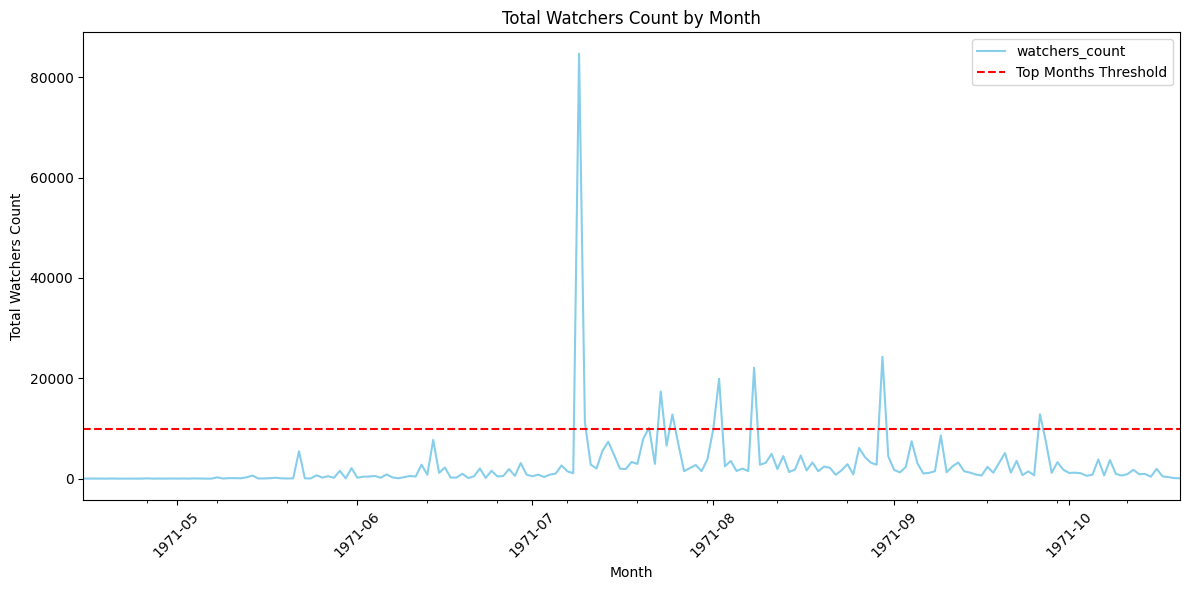

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the repositories.csv file
repositories = pd.read_csv("repositories.csv")

# Convert 'created_at' to datetime format
repositories['created_at'] = pd.to_datetime(repositories['created_at'])

# Set the 'created_at' column as the index
repositories.set_index('created_at', inplace=True)

# Group by month and sum the watchers_count for each month
monthly_watchers = repositories.resample('MS')['watchers_count'].sum()

# Identify the top months with the highest watchers_count
top_months = monthly_watchers.nlargest(10)

# Print the top months and their watchers count
print("Top months with the highest watchers count:")
print(top_months)

# Plot the aggregated data
plt.figure(figsize=(12, 6))
monthly_watchers.plot(kind='line', color='skyblue')

# Formatting the x-axis to show month and year
plt.title('Total Watchers Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Watchers Count')
plt.axhline(y=top_months.min(), color='r', linestyle='--', label='Top Months Threshold')

# Set the locator for the x-axis to show monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
